In [12]:
#*************************************************************
# Mario Segura
# End-to-End Length Analysis of Single Polymer Chains
# Comparison of Values at different temperatures
# Highest qualitative temperature value

# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

# Import 3D plotting tool

from mpl_toolkits.mplot3d import Axes3D

# Get a random number generator.
from numpy.random import default_rng
rng = default_rng()
rand = rng.random

In [13]:
#*************Polyethylene**************

# Number of Trials
num_trials = 1000

# Number of Steps
num_steps = 1000

#Step length
l = 0.154 #nm

# Deviance in bond length
b_l_d = 0.05

#Bond angle
phi = 109
theta = np.radians(180-phi)

#Deviance in bond angle of 5 degrees
b_a_d = np.radians(10)

#Vector Arrays
R = np.zeros(num_steps)
x = np.zeros(num_steps)
y = np.zeros(num_steps)

#displacement
End_to_End = np.zeros(num_steps)
disp = np.zeros(num_trials)

# Countour Length
cont_len = (num_steps * l)

x[1] = l
y[1] = 0

a = 0

for n in range(num_trials):
    for i in range(2,num_steps):
        theta_ref = np.arctan2([y[i-1]-y[i-2]],[x[i-1]-x[i-2]])
        theta_ref = theta_ref[0]
            # Randomness
        Rand = [-1,1]
        R = random.choice(Rand)
        d = b_a_d
        l_d = b_l_d
        rotate_r = np.matrix([[np.cos(theta_ref+(theta+(R*d))*R), np.sin(theta_ref+(theta+(R*d))*R)], 
                                [ np.sin(theta_ref+(theta+(R*d))*R), np.cos(theta_ref+(theta+(R*d))*R)]])   
        z_i_L = np.matrix.dot(rotate_r , np.matrix([[l+(l_d*R)],
                                                    [0]]))
            #local to global
        x[i] = x[i-1] + z_i_L[0]
        y[i] = y[i-1] + z_i_L[1]
    End_to_End = np.sqrt(x[-1]**2 + y[-1]**2)
    disp[a] = End_to_End
    a = a +1
    
displacement_sq = disp**2
mean_displacement_sq = np.mean(displacement_sq)
mean_disp = np.mean(disp)


In [14]:
# Average Kuhn Length
Kuhn_len = (mean_displacement_sq/cont_len)

# Average Persistence Length
Pers_len = (Kuhn_len / 2) 

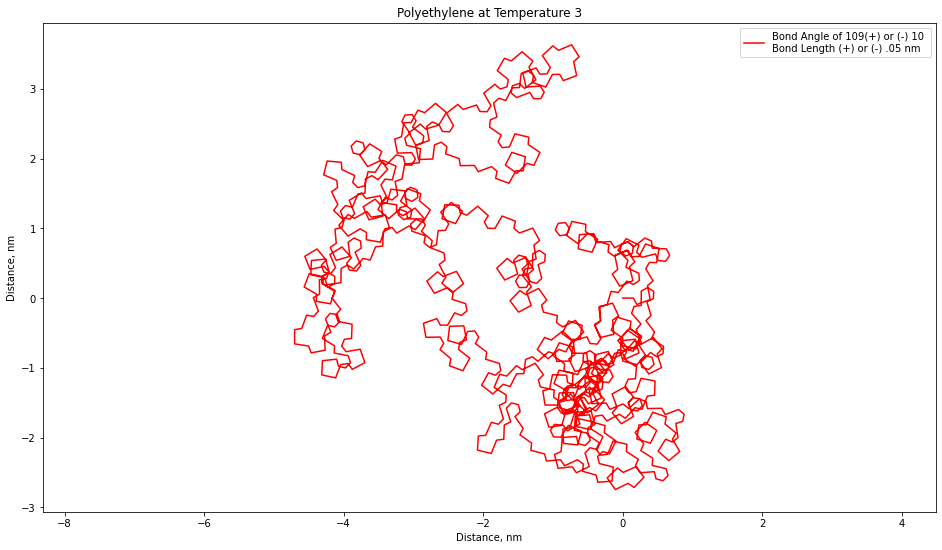

In [15]:
plt.figure(figsize = (16,9))
plt.plot(x,y, color = 'red',label = 'Bond Angle of 109(+) or (-) 10 \nBond Length (+) or (-) .05 nm')
plt.axis('equal')
plt.title('Polyethylene at Temperature 3')
plt.xlabel('Distance, nm')
plt.ylabel('Distance, nm')
plt.legend(loc = 'upper right')


Text(0, 0.5, 'Number of Occurances')

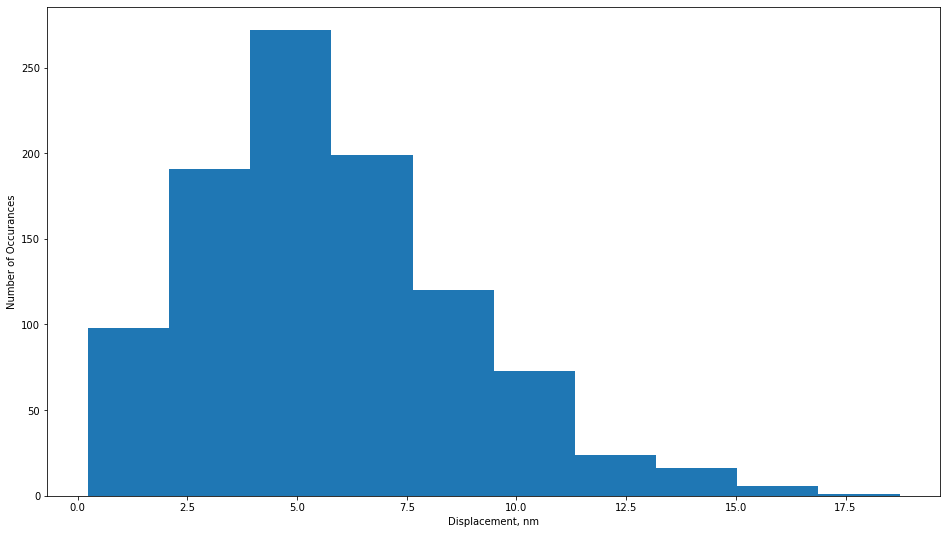

In [16]:
plt.figure(figsize = (16,9))
plt.hist(disp)
plt.xlabel('Displacement, nm')
plt.ylabel('Number of Occurances')

Text(0.5, 1.0, 'Polyethylene at Temperature 3')

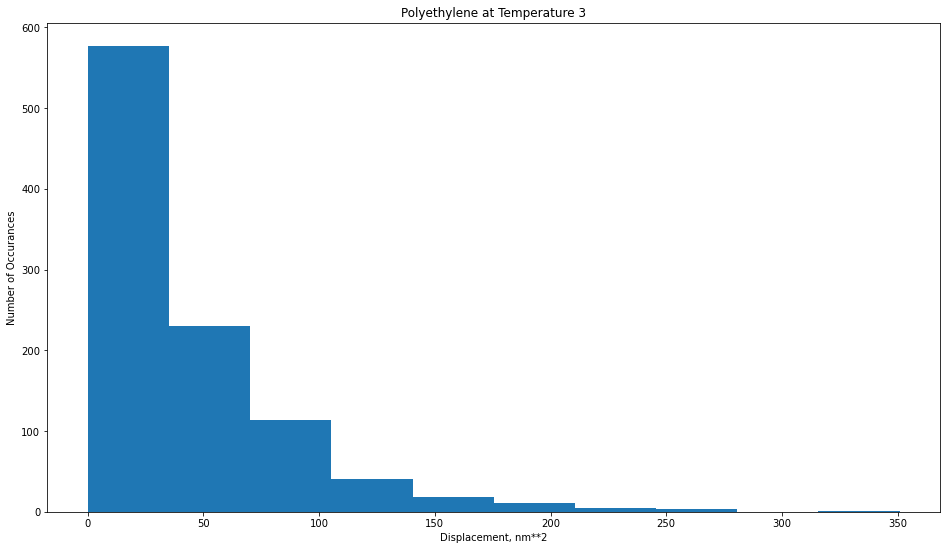

In [17]:
plt.figure(figsize = (16,9))
plt.hist(displacement_sq)
plt.xlabel('Displacement, nm**2')
plt.ylabel('Number of Occurances')
plt.title('Polyethylene at Temperature 3')

Text(0.5, 1.0, 'Log-Log Displacement vs Displacement**2')

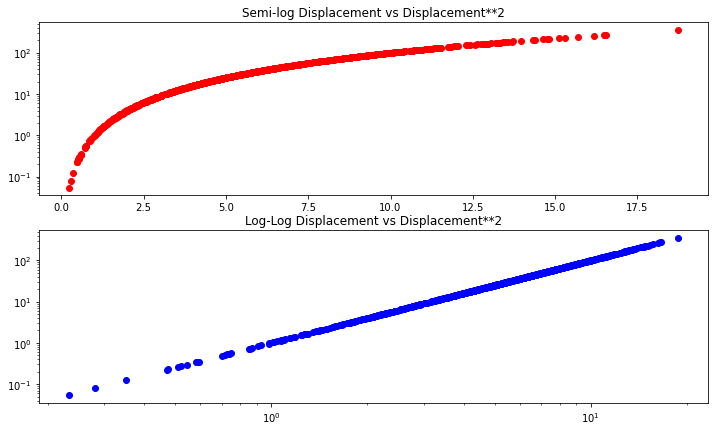

In [18]:
plt.figure(figsize = (12,7))
plt.subplot(2,1,1).semilogy(disp,displacement_sq,"or")
plt.title('Semi-log Displacement vs Displacement**2')
plt.subplot(2,1,2).loglog(disp,displacement_sq,"ob")
plt.title('Log-Log Displacement vs Displacement**2')

In [19]:
print("The average value of End to End displacement is {:,.4f} nm ".format(mean_disp))
print("The average value of End to End displacement**2 is {:,.4f} nm**2 ".format(mean_displacement_sq))
print("The Contour length is {:,.4f} nm ".format(cont_len))
print("The average Kuhn length is {:,.4f} nm ".format(Kuhn_len))
print("The average Persistence length is {:,.4f} nm ".format(Pers_len))

The average value of End to End displacement is 5.7357 nm 
The average value of End to End displacement**2 is 42.1013 nm**2 
The Contour length is 154.0000 nm 
The average Kuhn length is 0.2734 nm 
The average Persistence length is 0.1367 nm 
